In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df=pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [28]:
df.shape

(2200, 8)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [32]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


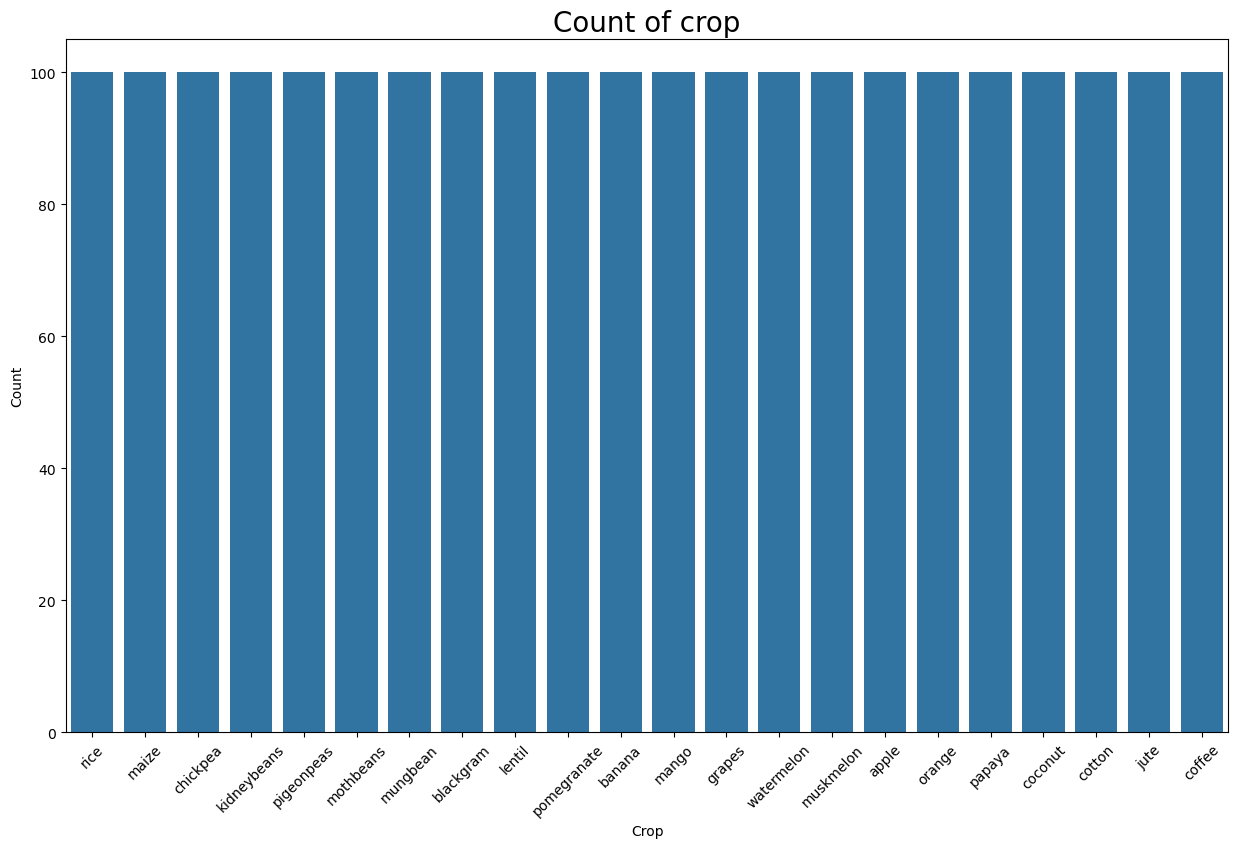

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.countplot(data=df, x='label')
ax.set(xlabel='Crop')
ax.set(ylabel='Count')
plt.xticks(rotation=45)

plt.title('Count of crop', fontsize = 20, c='black')
plt.show()

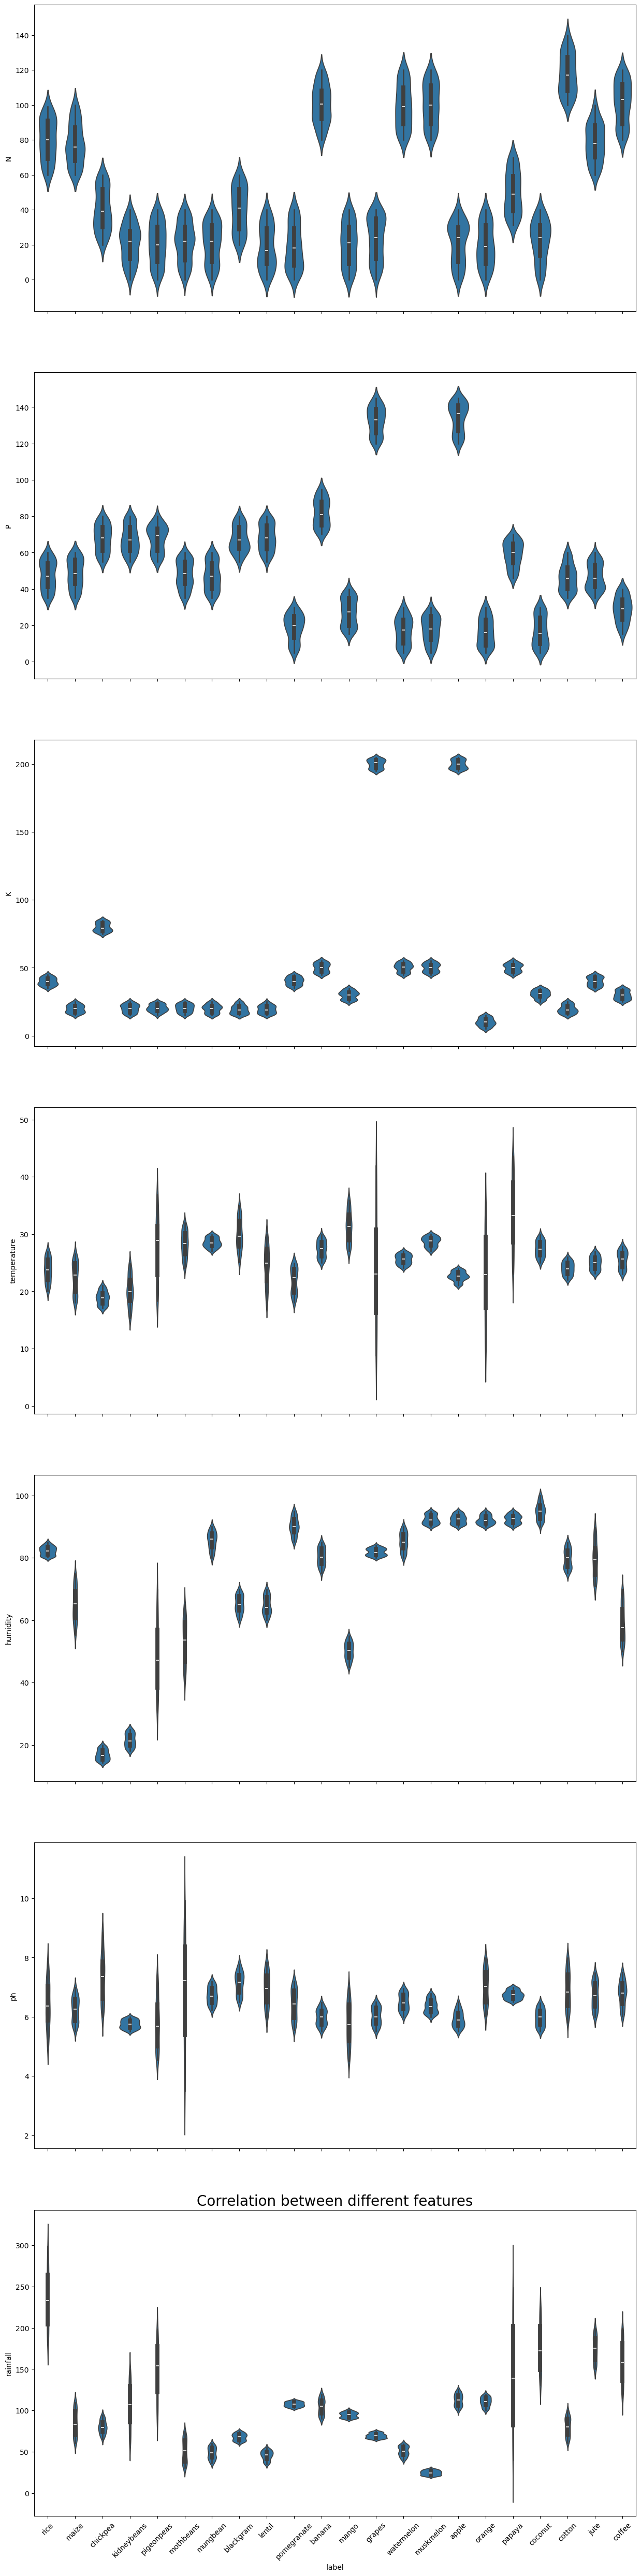

In [36]:
columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


fig, ax = plt.subplots(7, 1, figsize=(15, 63), sharex=True)

i = 0
for column in columns:
    sns.violinplot(data=df, x='label', y=column, ax=ax[i])
    plt.xticks(rotation=45)
    i = i + 1

plt.title('Correlation between different features', fontsize = 20, c='black')
plt.show()

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

target=['label']
features=['N', 'P','K', 'temperature', 'humidity', 'ph', 'rainfall']

x=df[features]
y=df[target]

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.33,random_state=42,shuffle=True)
models=[]

models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=0)))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))

model_name = []
accuracy = []

for name, model in models: 
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    model_name.append(name)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
    print(name, metrics.accuracy_score(y_test,y_pred))

DecisionTreeClassifier 0.9724517906336089


C:\Users\Chetan\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier 0.9931129476584022
KNeighborsClassifier 0.9752066115702479


C:\Users\Chetan\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


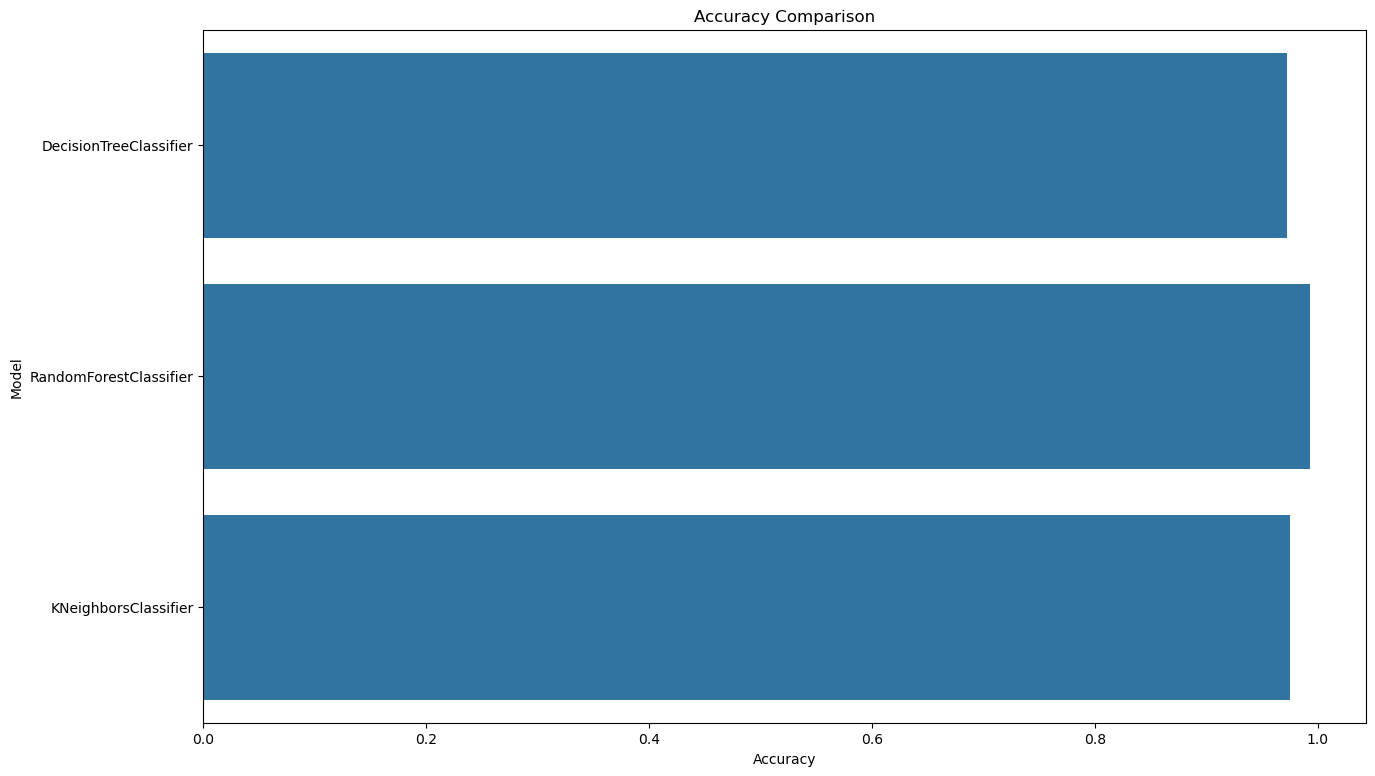

In [38]:
plt.figure(figsize=(15,9))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')

sns.barplot(x = accuracy, y = model_name)

plt.show()


C:\Users\Chetan\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


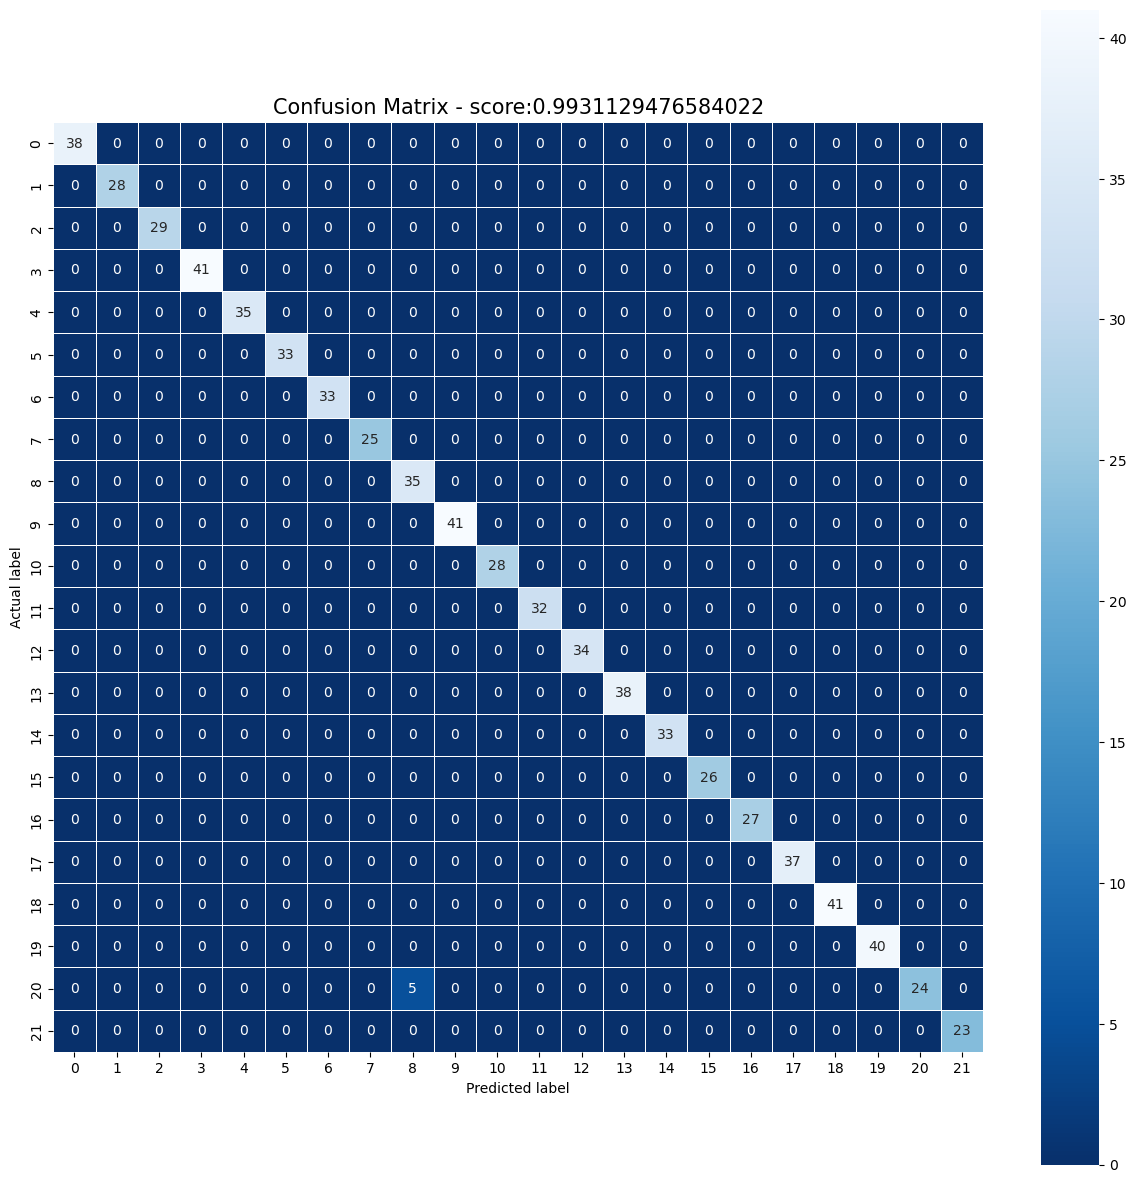

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       1.00      1.00      1.00        28
   blackgram       1.00      1.00      1.00        29
    chickpea       1.00      1.00      1.00        41
     coconut       1.00      1.00      1.00        35
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        33
      grapes       1.00      1.00      1.00        25
        jute       0.88      1.00      0.93        35
 kidneybeans       1.00      1.00      1.00        41
      lentil       1.00      1.00      1.00        28
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        34
   mothbeans       1.00      1.00      1.00        38
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        27
      papaya       1.00    

In [40]:
model=RandomForestClassifier(random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))